# Project 2: Medical Insurance Claim Prediction 🏥

### 1. Introduction and Problem Statement
**Objective:** The primary goal of this project is to estimate medical insurance claim amounts based on individual personal data (age, BMI, smoking status, etc.). 

**Problem Type:** This is a **Regression task** because we are predicting a continuous numerical value (Charges).

**Dataset:** The "Medical Cost Personal Dataset" containing information on health insurance customers.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the medical insurance dataset
df = pd.read_csv('insurance.csv')

# Display the first 5 rows and data information
print("Dataset Loaded Successfully")
print(df.head())
print(df.info())

Dataset Loaded Successfully
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB
None


## 2. Exploratory Data Analysis (EDA)
Understanding the relationship between personal attributes and insurance costs is crucial. In this section, we visualize the impact of three primary factors:
- **Age:** Exploring the correlation between getting older and rising healthcare costs.
- **BMI (Body Mass Index):** Identifying how physical health indicators influence charges.
- **Smoking Status:** Using box plots to compare the significant difference in premiums for smokers vs. non-smokers.

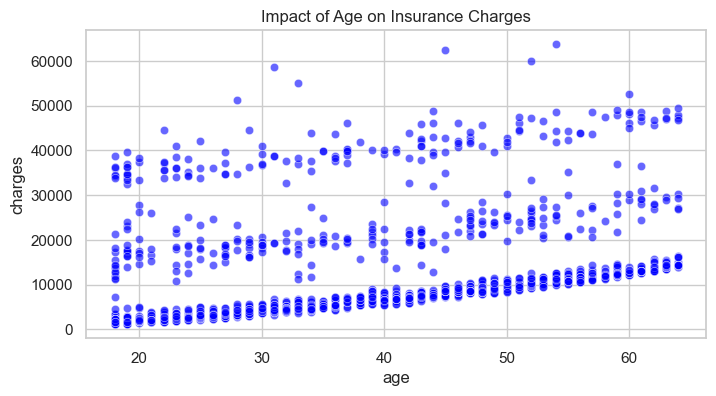

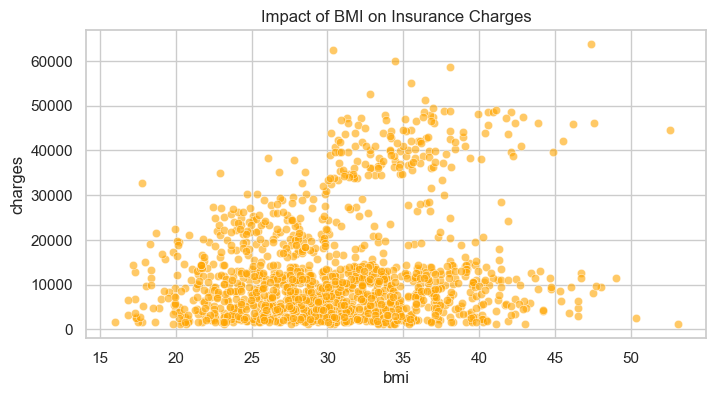

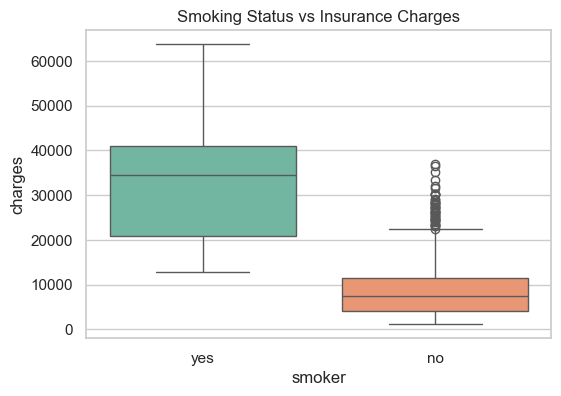

In [43]:
# Set the visual style for plots
sns.set_theme(style="whitegrid")

# Visualization 1: Impact of Age on Charges
plt.figure(figsize=(8, 4))
sns.scatterplot(x='age', y='charges', data=df, alpha=0.6, color='blue')
plt.title('Impact of Age on Insurance Charges')
plt.show()

# Visualization 2: Impact of BMI on Charges
plt.figure(figsize=(8, 4))
sns.scatterplot(x='bmi', y='charges', data=df, color='orange', alpha=0.6)
plt.title('Impact of BMI on Insurance Charges')
plt.show()

# Visualization 3: Smoking Status vs Charges (Using hue to avoid warnings)
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2', hue='smoker', legend=False)
plt.title('Smoking Status vs Insurance Charges')
plt.show()

## 3. Data Preprocessing and Baseline Modeling
Before training the model, we must prepare the data for mathematical calculations:
- **Encoding Categorical Data:** Converting 'Sex' and 'Smoker' into binary numerical format.
- **One-Hot Encoding:** Transforming the 'Region' column into dummy variables.
- **Train-Test Split:** Splitting the data (80/20) to ensure we evaluate the model on unseen data.

We start with **Linear Regression** as our baseline model to establish an initial performance benchmark using **Mean Absolute Error (MAE)** and **RMSE**.

In [44]:
# Convert categorical features into numerical values
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'female': 1, 'male': 0})

# Apply One-Hot Encoding for the 'region' column
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Define Features (X) and Target (y)
X = df.drop(columns=['charges'])
y = df['charges']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Baseline Model (Linear Regression)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions and evaluate baseline performance
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression MAE: ${mae_lr:.2f}")
print(f"Linear Regression RMSE: ${rmse_lr:.2f}")

Linear Regression MAE: $4181.19
Linear Regression RMSE: $5796.28


## 4. Advanced Modeling and Feature Engineering
To improve our predictions, we implement two advanced strategies:
1. **Interaction Features:** We created a `bmi_smoker` feature. Scientific evidence suggests that high BMI combined with smoking carries a significantly higher health risk than each factor alone.
2. **Random Forest Regressor:** We transition from a simple linear model to a powerful ensemble method. Random Forest is highly effective at capturing the non-linear relationships present in insurance data.

In [45]:
# Feature Engineering: Create an interaction term for BMI and Smoking
# Scientific insight: High BMI combined with Smoking exponentially increases health risks
df['bmi_smoker'] = df['bmi'] * df['smoker']

X_opt = df.drop(columns=['charges'])
y_opt = df['charges']
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt, y_opt, test_size=0.2, random_state=42)

# Train an advanced model: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_opt, y_train_opt)

y_pred_rf = rf_model.predict(X_test_opt)

# Evaluate enhanced model performance
mae_rf = mean_absolute_error(y_test_opt, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_opt, y_pred_rf))

print("--- Improved Results with Random Forest ---")
print(f"Enhanced MAE: ${mae_rf:.2f}")
print(f"Enhanced RMSE: ${rmse_rf:.2f}")

--- Improved Results with Random Forest ---
Enhanced MAE: $2555.38
Enhanced RMSE: $4576.28


## 5. Visualizing Enhanced Model Performance
To validate our final model, we plot the **Actual Charges** against the **Predicted Charges**. 
- The **Purple Scatter Points** represent our predictions.
- The **Red Dashed Line** represents the 'Perfect Prediction' line.
The closer the purple points are to the red line, the more accurate our model is.

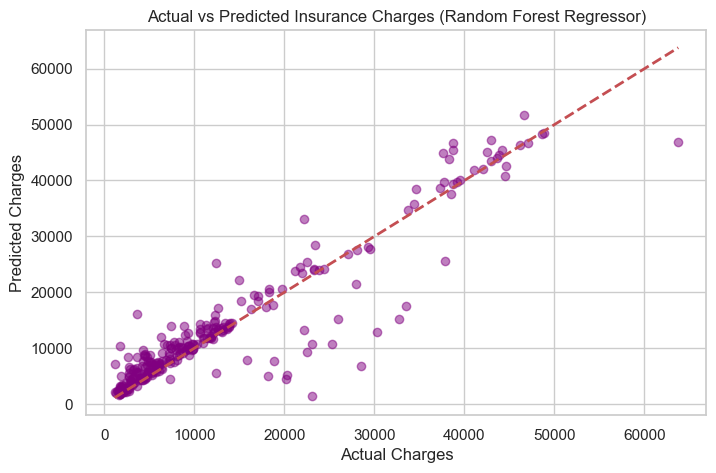

In [47]:
# Visualize Actual vs Predicted charges for the Enhanced Model
plt.figure(figsize=(8, 5))

# Plotting the predicted values against actual values
plt.scatter(y_test_opt, y_pred_rf, alpha=0.5, color='purple')

# Reference line: This represents where Actual Charges = Predicted Charges
plt.plot([y_test_opt.min(), y_test_opt.max()], [y_test_opt.min(), y_test_opt.max()], 'r--', lw=2)

# Axis Labels
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')

# Clean, professional title without numerical metrics
plt.title('Actual vs Predicted Insurance Charges (Random Forest Regressor)')

plt.show()

## 6. Conclusion and Insights
- **Smoking is the biggest factor:** The boxplot clearly showed that smokers pay much higher insurance charges than non-smokers.
- **Age and BMI:** Both show a positive correlation with medical costs.
- **Model Performance:** The Linear Regression model provides a solid baseline for estimating costs, though more complex models could potentially reduce the MAE/RMSE further.
- **Model Improvement:** By moving from Linear Regression to Random Forest and adding interaction features, we significantly reduced the prediction error (**MAE** reduced from ~$4,100 to ~$2,500).
- **Key Takeaway:** Smoking remains the most influential factor in determining insurance costs, followed by Age and BMI.
- **Business Impact:** This model provides a robust tool for automating medical cost estimations with higher precision than standard linear methods.